# Práctica KERAS en R con el dataset MNIST

## 1. Instalar KERAS

KERAS es una librería para la construcción de redes neuronales muy versátil y ampliamente utilizada por la comunidad de deep learning. Aunque fue diseñada originalmente para python en los últimos años se ha desarrollado una interfaz de KERAS en R para que sus usuarios también puedan beneficiarse de la potencia de KERAS. Información sobre por qué usar KERAS como librería principal para el diseño de redes neuronales puede encontrarse en el siguinte link: https://keras.rstudio.com/articles/why_use_keras.html . En cuanto a la instalación hay que hacer lo siguiente: 

Ir a la terminal y teclear:  pip install keras

In [1]:
# install.packages("keras")
# library(keras)
# install_keras()

## 2. Construccion de un modelo de KERAS

Hay dos maneras de construir un modelo en KERAS: el modelo secuencial y el modelo funcional. En el primer caso la red es una secuencia lineal de capas, mientras que el segundo caso permite una elaboración de redes con topologías más complejas (como por ejemplo redes acícliclas). Los pasos para construir una red son:

1- Diseñar la arquitectura de la red (ya sea mediante la manera secuencial o funcional).

2- Compilar el modelo (aqui se incluye la seleccion del algoritmo de aprendizaje y la funcion de coste a minimizar).

3- En este paso se introduce el dataset, la separación entre validacion y train, nº de epocas. En resumen se entrena la arquiterctura del paso 1 con el algoritmo seleccionado en el paso 2.

4- Utilizar el modelo para predecir.

### 2.1 El modelo secuencial

In [ ]:
# model <- keras_model_sequential() 
# model %>% 
#   layer_dense(units = neuronas ocultas 1, input_shape = neuronas de entrada, activation = "sigmoid") %>% # Primera capa oculta
#   layer_dense(units = neuronas ocultas 2, activation = "sigmoid") %>% # Segunda capa oculta
#   layer_dense(units = neuronas de salida , activation = "sigmoid") # capa de salida

### 2.2 El modelo funcional

In [5]:
# inputs = layer_input(shape = dim(xT)[-1])
# x = inputs
# l1 = layer_dense(x,units = neuronas ocultas 1, activation = "sigmoid")
# l2 = layer_dense(l1,units = neuronas ocultas 2, activation = "sigmoid")
# outputs = layer_dense(l1,units = neuronas de salida, activation = "sigmoid")

# model <- keras_model(inputs = inputs, outputs = outputs)

### 2.3 Compilar el modelo y entrenar

In [6]:
#  model %>% compile(optimizer = optimizer_adam(lr = learning_rate), 
#                     loss = "mse")

#  model %>% fit(xT, yT, epochs = epochs, batch_size = 100, validation_split = 0.1, callbacks = callbacks, verbose = 1)  

### 2.4 Predecir

In [ ]:
# prediction <- model$predict(xt) 

## 3. Construir una red neuronal para el dataset MNIST

### 3.1 Cargar el dataset MNIST

In [2]:
data = read.csv("MNIST_train.csv")

### 3.2 Preprocesar los datos 

In [20]:
# normalización, adecuar las matrices con las columnas apropiadas (por ejemplo, 784 en la entrada) ...


## matriz de salida (neuronas de salida)
convert_categorical <- function(object,classes){
  y <- matrix(data = 0, nrow = length(object), ncol = length(classes))
  for (i in classes){
    ind_class <- which(object == i)
    y[ind_class,i+1] <- 1
  }
  return(y)
}
classes <- 0:9
y <- convert_categorical(data$label,0:9)

## matriz de entrada (neuronas de entrada)
x <- as.matrix(data)[,-1]

## normalizar/escalar
x <- x/max(x)

## train/test 
indtrain = 1:30000
indtest = 30001:42000
x.train = x[indtrain,] 
x.test = x[indtest,]
y.train = y[indtrain,] 
y.test = y[indtest,]

#### 3.3.1 Construir una red con estructura 784-100-100-10 mediante el modelo secuencial y entrenar

In [16]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 100, input_shape = 784, activation = "sigmoid") %>% # Primera capa oculta
  layer_dense(units = 100, activation = "sigmoid") %>% # Segunda capa oculta
  layer_dense(units = 10, activation = "sigmoid") # capa de salida


model %>% compile(optimizer = optimizer_sgd(lr = 0.1), 
                  loss = "mse")

model %>% fit(x.train, y.train, epochs = 100, batch_size = 100, verbose = 1)   

#### 3.3.2 Construir una red con estructura 784-100-100-10 mediante el modelo funcional y entrenar

In [ ]:
inputs = layer_input(shape = ncol(x.train))
x = inputs
l1 = layer_dense(x,units = 100, activation = "sigmoid")
l2 = layer_dense(l1,units = 100, activation = "sigmoid")
outputs = layer_dense(l2,units = 10, activation = "sigmoid")

model <- keras_model(inputs = inputs, outputs = outputs)

model %>% compile(optimizer = optimizer_sgd(lr = 0.1), 
                  loss = "mse")

model %>% fit(x.train, y.train, epochs = 100, batch_size = 100, verbose = 1)  

### 3.4 Predecir en el conjunto de test y validar para el modelo funcional

In [17]:
# Predice aquí
prediction <- model$predict(x.test)
head(prediction)
head(y.test)

0.067009248,0.0160897784,0.02885673,0.795058489,0.003580665,0.22023968,0.001158146,0.04652021,0.14661901,0.01958494
0.003300006,0.0425581448,0.13915086,0.082470760,0.023854434,0.06839489,0.009910174,0.02436367,0.43371058,0.06540208
0.849139631,0.0019514544,0.02873480,0.008222030,0.004645118,0.07780185,0.050297242,0.04095090,0.01557135,0.01235727
0.749206424,0.0001935133,0.09580080,0.018666912,0.028876664,0.11119308,0.041888095,0.01323819,0.04042901,0.02117123
0.017377513,0.0575768501,0.05822547,0.835747778,0.003071389,0.15936282,0.001938959,0.03347514,0.14887349,0.01707526
0.011083412,0.0014912268,0.04528209,0.001209044,0.838942826,0.03129595,0.196137264,0.02155321,0.04353484,0.17111973


0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0


Ahora valida calculando el AUC por dígito y el accuracy tal y como visteis en la práctica de KNN

[1] 3 8 0 0 3 4

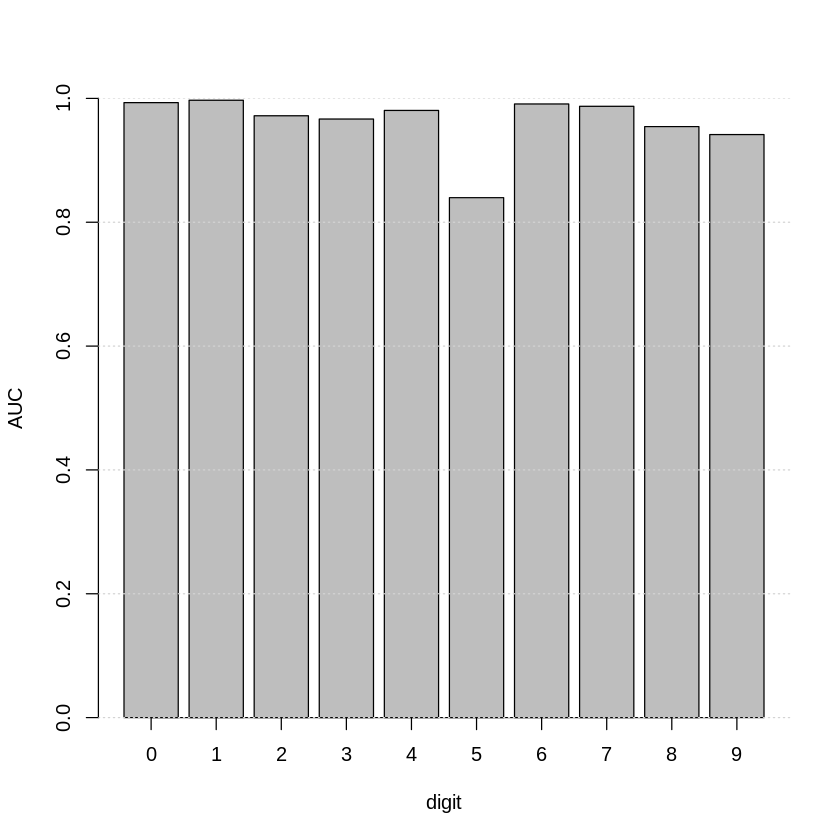

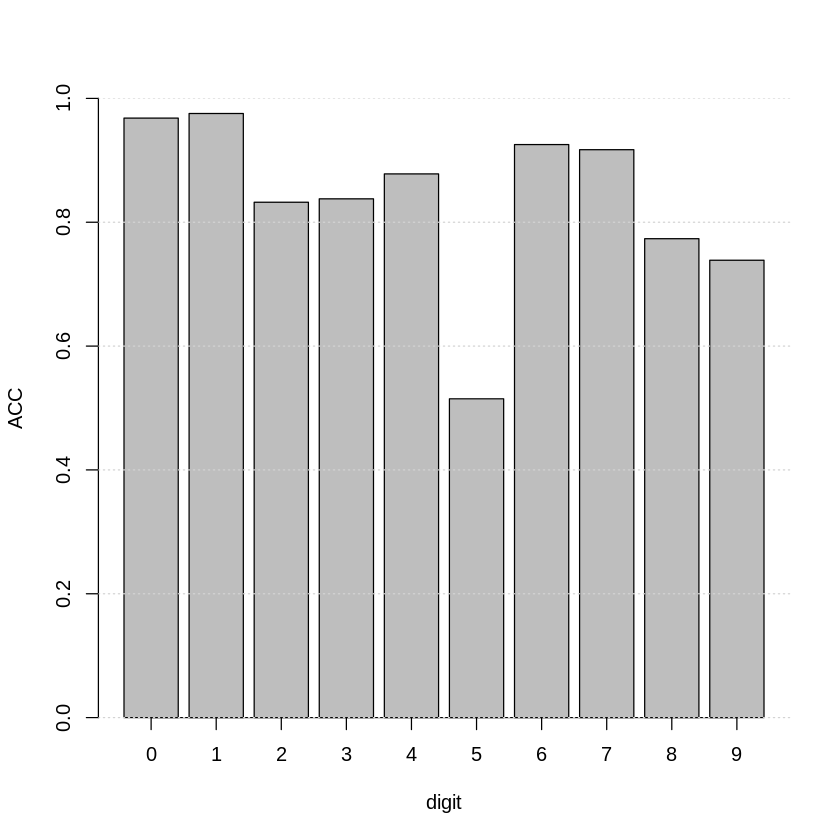

In [26]:
# install.packages("verification")

## AUC
library(verification)
auc <- vector(mode = "numeric", length = length(classes))
for (i in 1:length(classes)){
    auc[i] <- roc.area(obs = y.test[,i], pred = prediction[,i])$A
}
bp = barplot(auc, ylim = c(0, 1), xlab = "digit", ylab = "AUC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)

## Accuracy
predicted_classes <- apply(prediction,MARGIN = 1,FUN = function(z){
  which(z == max(z)) - 1 
})
head(predicted_classes)
acc.digit <- c()
for (digit in 0:9) {
  ind.digit = which(data$label[indtest] == digit) 
  acc.digit = c(acc.digit, sum(predicted_classes[ind.digit] == digit) / length(ind.digit))
}
bp = barplot(acc.digit, ylim = c(0, 1), xlab = "digit", ylab = "ACC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)

### 3.5 Reponde a las siguientes preguntas

1 - ¿Para qué número obtengo el AUC más alto? ¿y para cuál el más bajo?

In [ ]:
# ESCRIBE AQUÍ

2 - Construir una red con estructura 784-50-25-50-10, ¿qué es lo que sucede en el entrenamiento?¿por qué no funciona bien?

In [27]:
inputs = layer_input(shape = ncol(x.train))
x = inputs
l1 = layer_dense(x,units = 50, activation = "sigmoid")
l2 = layer_dense(l1,units = 25, activation = "sigmoid")
l3 = layer_dense(l2,units = 50, activation = "sigmoid")
outputs = layer_dense(l3,units = 10, activation = "sigmoid")

model <- keras_model(inputs = inputs, outputs = outputs)

model %>% compile(optimizer = optimizer_sgd(lr = 0.1), 
                  loss = "mse")

model %>% fit(x.train, y.train, epochs = 100, batch_size = 100, verbose = 1)  

prediction <- model$predict(x.test)
head(prediction)
head(y.test)

0.1147933,0.1211501,0.10067306,0.10740993,0.09860522,0.09276074,0.09890246,0.1064993,0.09771004,0.09928624
0.1086049,0.1328589,0.10641371,0.10653520,0.09878405,0.09092653,0.10660346,0.1070312,0.09846143,0.09917268
0.1291738,0.1112703,0.09822667,0.09898456,0.09760666,0.09268251,0.10030188,0.1091220,0.09722679,0.09912296
0.1292663,0.1061805,0.09827562,0.10130062,0.09905519,0.09411534,0.09951213,0.1083663,0.09763851,0.09993573
0.1067567,0.1351527,0.10293305,0.10794264,0.09751575,0.09143893,0.10417434,0.1048052,0.09687675,0.09946298
0.1219551,0.1136348,0.09938610,0.10252925,0.10017800,0.09253226,0.09967619,0.1072528,0.09717000,0.10025271


0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0


3- ¿Crees que para problemas de clasificación es apropiado minimizar el mean squared error? Construye una red minimizando el categorical cross-entropy, tal que en compile(loss = "categorical_crossentropy") y vuelve a calcular los índices de validación...¿ves alguna diferencia con respecto a cuando se entrenó minimizando el "mse"?

In [29]:
inputs = layer_input(shape = ncol(x.train))
x = inputs
l1 = layer_dense(x,units = 100, activation = "sigmoid")
l2 = layer_dense(l1,units = 100, activation = "sigmoid")
outputs = layer_dense(l2,units = 10, activation = "sigmoid")

model <- keras_model(inputs = inputs, outputs = outputs)

model %>% compile(optimizer = optimizer_sgd(lr = 0.1), 
                  loss = "categorical_crossentropy")

model %>% fit(x.train, y.train, epochs = 100, batch_size = 100, verbose = 1)  

7.365203e-07,5.118366e-07,6.959595e-07,2.916135e-02,1.296139e-08,1.427960e-04,7.850476e-10,7.640726e-08,3.393218e-05,1.543194e-06
5.905732e-07,8.531410e-08,2.877520e-04,7.005421e-06,7.047992e-09,9.200050e-09,2.271642e-08,3.965670e-07,3.808968e-02,8.584361e-08
1.017370e-02,7.209212e-10,2.801821e-06,2.071658e-08,5.466886e-07,1.107683e-06,3.414130e-06,7.828919e-05,5.672280e-09,7.000956e-05
2.524150e-02,1.414615e-10,7.110945e-04,3.439816e-08,9.852965e-07,7.301799e-08,9.227932e-07,2.986786e-06,6.871124e-07,1.385735e-06
2.139508e-08,9.406623e-06,1.154859e-05,5.831528e-01,2.689919e-08,1.466192e-05,1.345438e-09,2.352152e-07,8.823892e-06,2.774810e-07
2.517615e-07,4.361457e-09,1.469752e-06,9.043193e-09,7.150373e-01,1.562493e-06,1.178639e-04,3.391073e-07,5.773092e-08,6.993813e-06


0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0


[1] 3 8 0 0 3 4

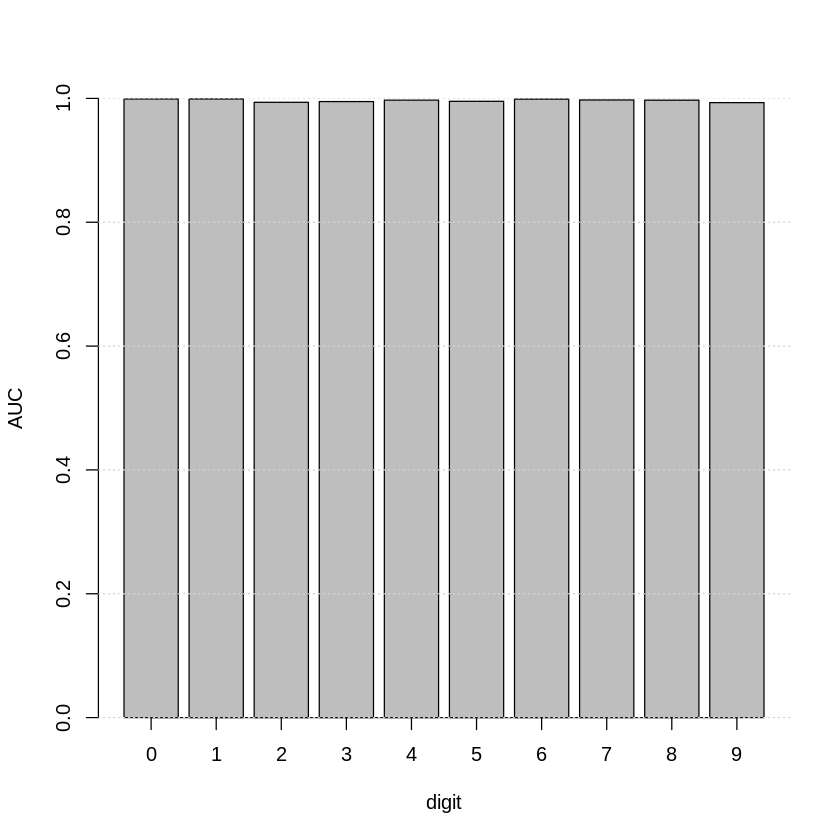

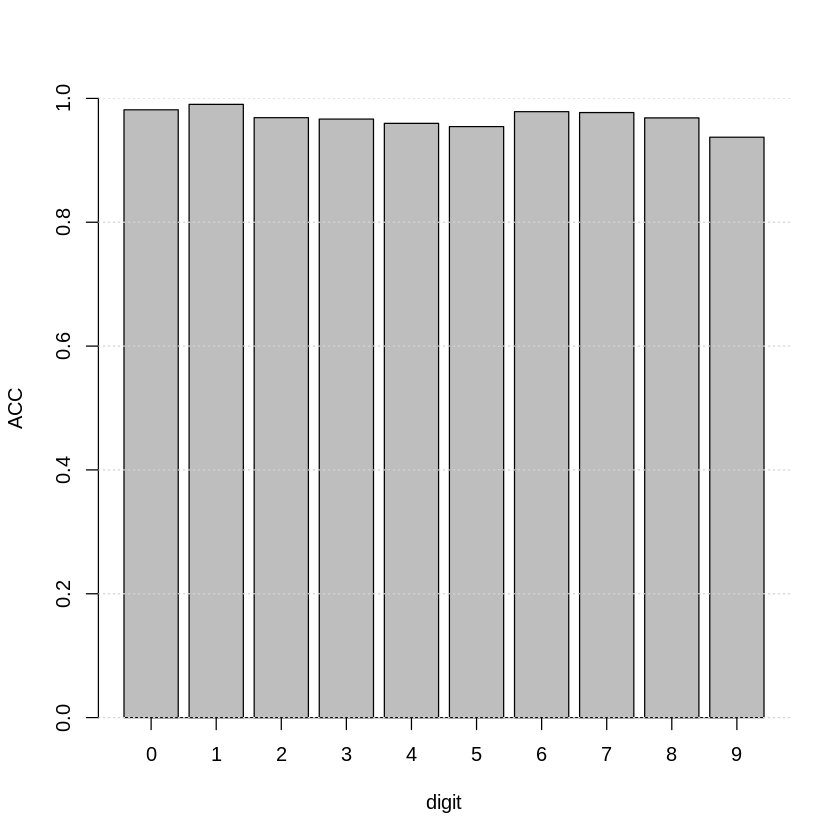

In [30]:
prediction <- model$predict(x.test)
head(prediction)
head(y.test)

## AUC
library(verification)
auc <- c()
for (i in 1:length(classes)){
    auc[i] <- roc.area(obs = y.test[,i], pred = prediction[,i])$A
}
bp = barplot(auc, ylim = c(0, 1), xlab = "digit", ylab = "AUC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)

## Accuracy
predicted_classes <- apply(prediction,MARGIN = 1,FUN = function(z){
  which(z == max(z)) - 1 
})
head(predicted_classes)
acc.digit <- c()
for (digit in 0:9) {
  ind.digit = which(data$label[indtest] == digit) 
  acc.digit = c(acc.digit, sum(predicted_classes[ind.digit] == digit) / length(ind.digit))
}
bp = barplot(acc.digit, ylim = c(0, 1), xlab = "digit", ylab = "ACC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)

### 3.6 Early-Stopping y como guardar el modelo

En las redes neuronales hay muchos parámetros y por tanto en muchas ocasiones es necesario adoptar medidas de regularización como el early-stopping. El early-stopping consiste en parar el entrenamiendo cuando se cumpla un criterio como los siguientes:

    1- Que la diferencia del error entre el dataset de train y el dataset de validación no supere un mínimo
    
    2- Cuando el error de validación deje de disminuir.

La manera de implementarlo en KERAS es a través de los callbacks. Los callbacks se refieren a funciones que solo aplican durante el entrenamiento (por ejemplo, el early-stopping solo tiene sentido mientras el modelo entrena, cuando ya está entrenado no hay nada que parar). El registro completo de callbacks definidos en KERAS puede verse en el siguiente link: https://keras.io/callbacks/  . En esta clase vamos a ver dos funciones pertenecientes a los callbacks: el callback del early-stopping y el callback de guardar el modelo en cada época.

#### 3.6.1 Callback del early-stopping

In [28]:
# callbacks = list(callback_early_stopping(patience = patience))

# inputs = layer_input(shape = dim(xT)[-1])
# x = inputs
# l1 = layer_dense(x,units = neuronas ocultas 1, activation = "sigmoid")
# l2 = layer_dense(l1,units = neuronas ocultas 2, activation = "sigmoid")
# outputs = layer_dense(l2,units = neuronas de salida, activation = "sigmoid")

# model <- keras_model(inputs = inputs, outputs = outputs)

#  model %>% compile(optimizer = optimizer_sgd(lr = learning_rate), 
#                     loss = "mse") 
                     

#  model %>% fit(xT, yT, epochs = epochs, batch_size = 100, validation_split = 0.1, callbacks = callbacks, verbose = 1) 

#### 3.6.2 Callback de guardar el modelo

In [ ]:
# callbacks = list(callback_model_checkpoint(filepath='filename.h5'))

# inputs = layer_input(shape = dim(xT)[-1])
# x = inputs
# l1 = layer_dense(x,units = neuronas ocultas 1, activation = "sigmoid")
# l2 = layer_dense(l1,units = neuronas ocultas 2, activation = "sigmoid")
# outputs = layer_dense(l2,units = neuronas de salida, activation = "sigmoid")

# model <- keras_model(inputs = inputs, outputs = outputs)

#  model %>% compile(optimizer = optimizer_sgd(lr = learning_rate), 
#                     loss = "mse") 


#  model %>% fit(xT, yT, epochs = epochs, batch_size = 100, validation_split = 0.1, callbacks = callbacks, verbose = 1) 

#### 3.6.3 Guardar únicamente el mejor modelo de acuerdo al criterio del early-stopping... y cargarlo

In [ ]:
# callbacks = list(callback_early_stopping(patience = patience), callback_model_checkpoint(filepath=paste0('filename.h5'), monitor='val_loss', save_best_only=TRUE))

# inputs = layer_input(shape = dim(xT)[-1])
# x = inputs
# l1 = layer_dense(x,units = neuronas ocultas 1, activation = "sigmoid")
# l2 = layer_dense(l1,units = neuronas ocultas 2, activation = "sigmoid")
# outputs = layer_dense(l2,units = neuronas de salida, activation = "sigmoid")

# model <- keras_model(inputs = inputs, outputs = outputs)

#  model %>% compile(optimizer = optimizer_sgd(lr = learning_rate), 
#                     loss = "mse") 


#  model %>% fit(xT, yT, epochs = epochs, batch_size = 100, validation_split = 0.1, callbacks = callbacks, verbose = 1) 

# k_clear_session()

# load_model_hdf5(filepath = "filename.h5")


#### 3.6.4 Responde a las siguientes preguntas

Entrena el mismo modelo con y sin early-stopping (sin early-stopping quiere decir que entreneis 200 épocas, por ejemplo). Cargalo y calcula el AUC.

    1- ¿qué modelo obtiene un AUC mayor para todos los números, el del early-stopping o el que no, en el dataset de TRAIN?
    
    2- ¿qué modelo obtiene un AUC mayor para todos los números, el del early-stopping o el que no, en el dataset de TEST?

In [40]:
callbacks = list(callback_early_stopping(patience = 20), callback_model_checkpoint(filepath=paste0('filename.h5'), monitor='val_loss', save_best_only=TRUE))

inputs = layer_input(shape = ncol(x.train))
x = inputs
l1 = layer_dense(x,units = 1000, activation = "sigmoid")
l2 = layer_dense(l1,units = 1000, activation = "sigmoid")
outputs = layer_dense(l2,units = 10, activation = "sigmoid")

model <- keras_model(inputs = inputs, outputs = outputs)

model %>% compile(optimizer = optimizer_sgd(lr = 0.1), 
                   loss = "mse")
                   

model %>% fit(x.train, y.train, epochs = 100, batch_size = 100, validation_split = 0.1, verbose = 1, callbacks = callbacks) 

k_clear_session()


In [41]:
inputs = layer_input(shape = ncol(x.train))
x = inputs
l1 = layer_dense(x,units = 1000, activation = "sigmoid")
l2 = layer_dense(l1,units = 1000, activation = "sigmoid")
outputs = layer_dense(l2,units = 10, activation = "sigmoid")

model <- keras_model(inputs = inputs, outputs = outputs)

model %>% compile(optimizer = optimizer_sgd(lr = 0.1), 
                   loss = "mse")

model %>% fit(x.train, y.train, epochs = 100, batch_size = 100, validation_split = 0.1, verbose = 1) 

0.0002481887,8.531629e-01,0.06504428,0.070247643,0.0262897853,0.07545203,0.0072338423,0.008226607,0.169660598,0.0139332283
0.9891869426,2.312603e-06,0.18443650,0.012571925,0.0001543846,0.01607762,0.0040254057,0.008434493,0.011582259,0.0004413446
0.0001578105,9.466943e-01,0.02386065,0.052125584,0.0062623397,0.06278173,0.0701259524,0.045781076,0.029963609,0.0265233014
0.0154165896,3.107595e-03,0.06623205,0.003590131,0.1665300131,0.01563256,0.0893334970,0.069738746,0.001810462,0.0169568788
0.9962428808,1.251765e-06,0.20578220,0.022008693,0.0001148562,0.01775490,0.0007014213,0.009376074,0.010343317,0.0003934158
0.3818340600,3.519562e-05,0.04193171,0.014971762,0.0148175880,0.03662684,0.0081537180,0.018482612,0.010305460,0.0100549459


0.0003201609,8.492642e-01,0.07167722,0.078068025,2.769152e-02,0.07816012,0.0055849417,0.009146162,0.166382492,0.0124256108
0.9897691011,2.741734e-06,0.16752124,0.008596215,1.333212e-04,0.01695181,0.0042926325,0.008407529,0.016964639,0.0005179198
0.0001966077,9.477892e-01,0.02993511,0.053856835,6.524307e-03,0.05779634,0.0621857122,0.052882154,0.025826082,0.0286224280
0.0129422741,3.674982e-03,0.08394258,0.003538254,1.759915e-01,0.01690928,0.0919964686,0.066648416,0.002214169,0.0144238165
0.9962187409,1.683076e-06,0.17985839,0.017078273,9.858348e-05,0.01993608,0.0007652292,0.009561386,0.015254237,0.0003834179
0.3531777263,3.801890e-05,0.04573473,0.013578438,1.599855e-02,0.04025893,0.0082352757,0.017558038,0.011253593,0.0084663443


0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0


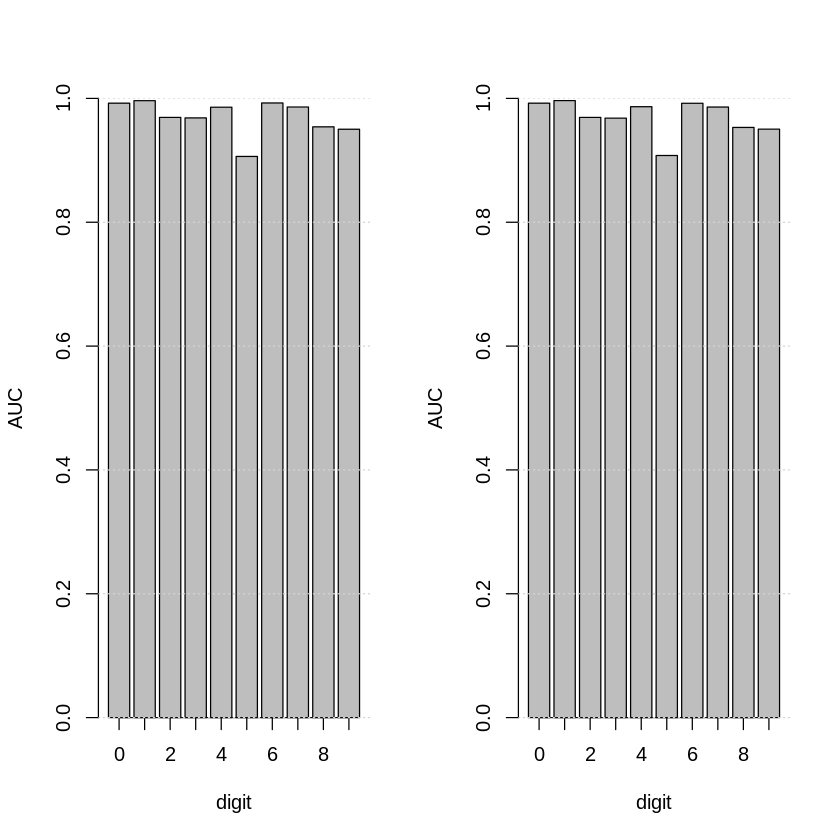

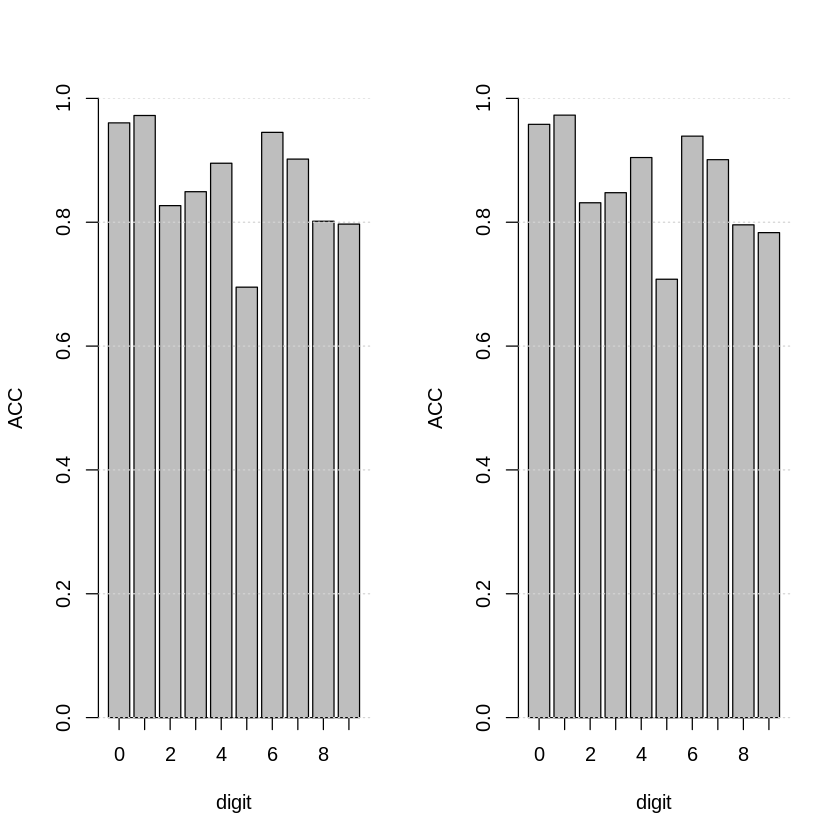

In [43]:
## TRAIN
model_ES <- load_model_hdf5(filepath = "filename.h5")

prediction_ES <- model_ES$predict(x.train)
prediction <- model$predict(x.train)
head(prediction)
head(prediction_ES)
head(y.train)

## AUC
library(verification)
auc_ES <- c()
auc <- c()
for (i in 1:length(classes)){
    auc[i] <- roc.area(obs = y.train[,i], pred = prediction[,i])$A
    auc_ES[i] <- roc.area(obs = y.train[,i], pred = prediction_ES[,i])$A
}
par(mfrow = c(1,2))
bp = barplot(auc, ylim = c(0, 1), xlab = "digit", ylab = "AUC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)
bp = barplot(auc_ES, ylim = c(0, 1), xlab = "digit", ylab = "AUC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)

## Accuracy
predicted_classes <- apply(prediction,MARGIN = 1,FUN = function(z){
  which(z == max(z)) - 1 
})
predicted_classes_ES <- apply(prediction_ES,MARGIN = 1,FUN = function(z){
  which(z == max(z)) - 1 
})
acc.digit <- c()
acc.digit_ES <- c()
for (digit in 0:9) {
  ind.digit = which(data$label[indtrain] == digit) 
  acc.digit = c(acc.digit, sum(predicted_classes[ind.digit] == digit) / length(ind.digit))
  acc.digit_ES = c(acc.digit_ES, sum(predicted_classes_ES[ind.digit] == digit) / length(ind.digit))
}
par(mfrow = c(1,2))
bp = barplot(acc.digit, ylim = c(0, 1), xlab = "digit", ylab = "ACC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)
bp = barplot(acc.digit_ES, ylim = c(0, 1), xlab = "digit", ylab = "ACC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)


0.052980527,1.902084e-03,0.01045868,0.8311060071,0.001491384,0.23290282,8.790687e-05,0.020222273,0.078670338,0.008404521
0.001305986,1.013827e-02,0.14869240,0.0165573917,0.003858841,0.02154644,3.532989e-03,0.013698108,0.725871980,0.051155955
0.886316776,6.179628e-05,0.02690145,0.0012063754,0.001115383,0.02268763,5.241434e-02,0.044771582,0.003053264,0.006560842
0.868812978,2.064983e-06,0.09495912,0.0031410991,0.006341397,0.03050074,1.061045e-02,0.006237412,0.014655327,0.006822252
0.003986946,2.516041e-02,0.02940992,0.9105044603,0.001606515,0.12210617,2.852461e-04,0.019314738,0.053524259,0.017113030
0.017187983,1.052198e-04,0.02741166,0.0001216929,0.929612339,0.01038369,1.610453e-01,0.009260621,0.014122627,0.091743290


0.041354764,2.247015e-03,0.01075680,0.8637146950,0.0015708520,0.25978461,9.825097e-05,0.021107629,0.073326141,0.007958832
0.001556652,1.032546e-02,0.13034220,0.0174769722,0.0034610231,0.02124817,3.171433e-03,0.015697755,0.702768922,0.057670150
0.878979564,8.489245e-05,0.01880086,0.0010677349,0.0008946348,0.02893852,4.974194e-02,0.045436051,0.004838436,0.008613369
0.844229102,2.934704e-06,0.10498744,0.0031034080,0.0077369036,0.03120884,1.021841e-02,0.005873608,0.015602678,0.005632457
0.003750847,3.472938e-02,0.02964795,0.9190960526,0.0015606210,0.13574065,3.265730e-04,0.020606466,0.046186168,0.013273282
0.011957673,1.145830e-04,0.03114301,0.0001065136,0.9288147688,0.01193222,1.601700e-01,0.010451076,0.013425279,0.087818243


0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0


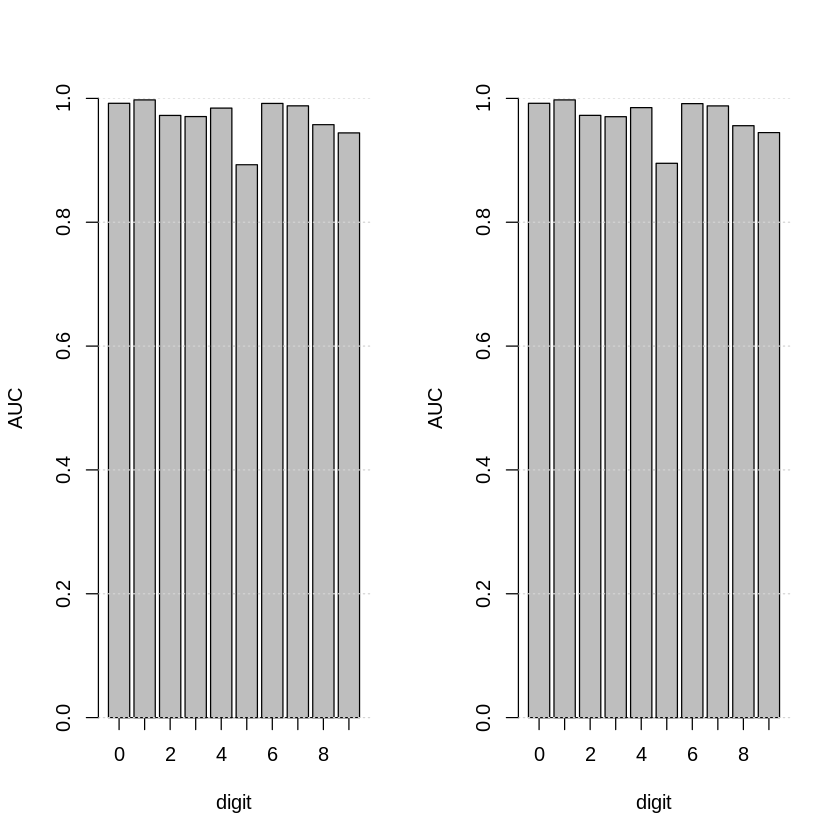

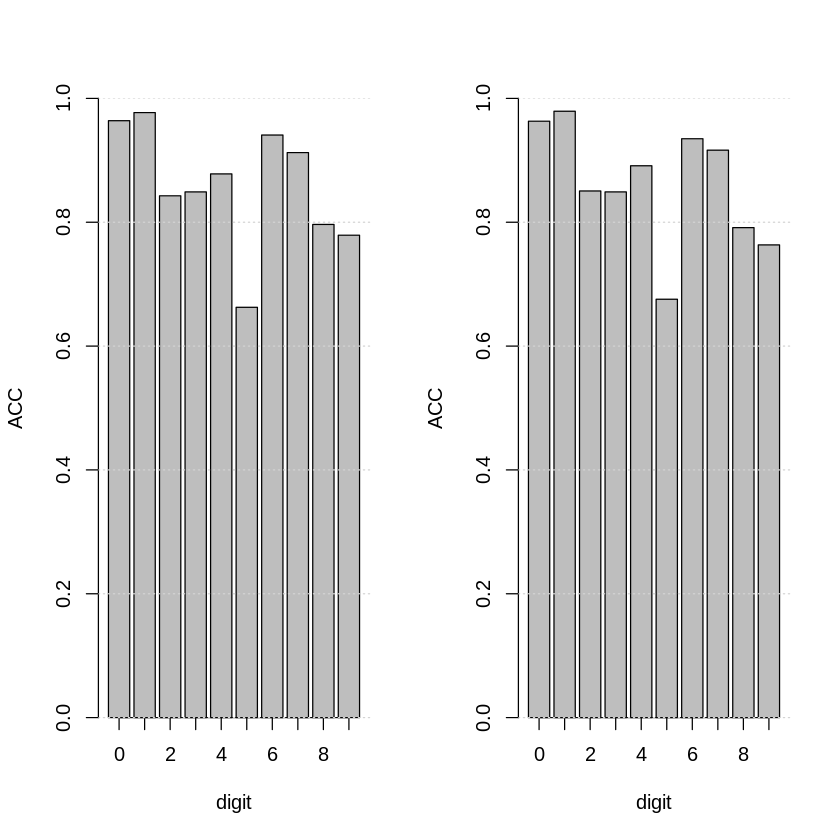

In [44]:
## TEST
model_ES <- load_model_hdf5(filepath = "filename.h5")

prediction_ES <- model_ES$predict(x.test)
prediction <- model$predict(x.test)
head(prediction)
head(prediction_ES)
head(y.test)

## AUC
library(verification)
auc_ES <- c()
auc <- c()
for (i in 1:length(classes)){
    auc[i] <- roc.area(obs = y.test[,i], pred = prediction[,i])$A
    auc_ES[i] <- roc.area(obs = y.test[,i], pred = prediction_ES[,i])$A
}
par(mfrow = c(1,2))
par(mfrow = c(1,2))
bp = barplot(auc, ylim = c(0, 1), xlab = "digit", ylab = "AUC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)
bp = barplot(auc_ES, ylim = c(0, 1), xlab = "digit", ylab = "AUC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)

## Accuracy
predicted_classes <- apply(prediction,MARGIN = 1,FUN = function(z){
  which(z == max(z)) - 1 
})
predicted_classes_ES <- apply(prediction_ES,MARGIN = 1,FUN = function(z){
  which(z == max(z)) - 1 
})
acc.digit <- c()
acc.digit_ES <- c()
for (digit in 0:9) {
  ind.digit = which(data$label[indtest] == digit) 
  acc.digit = c(acc.digit, sum(predicted_classes[ind.digit] == digit) / length(ind.digit))
  acc.digit_ES = c(acc.digit_ES, sum(predicted_classes_ES[ind.digit] == digit) / length(ind.digit))
}
par(mfrow = c(1,2))
bp = barplot(acc.digit, ylim = c(0, 1), xlab = "digit", ylab = "ACC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)
bp = barplot(acc.digit_ES, ylim = c(0, 1), xlab = "digit", ylab = "ACC")
axis(1, at = bp, labels = 0:9)
grid(nx = NA, ny = NULL)



## 4. Diseña una arquitectura original

In [ ]:
Un ejemplo de arquitectura atípica serian las deep residual networks: 

<img src="deepresidual.png" width= "500"/>

In [ ]:
# DESCRIBIR LA RED DE PALABRA AQUÍ

In [ ]:
# IMPLEMENTAR LA RED AQUÍ